<a href="https://colab.research.google.com/github/VindaShinde/ML-basic_Models/blob/main/Evaluation_BreastCancer_Tumor_Models_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating Breast cancer Tumor

# Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_Cancer.csv to dataset_Cancer.csv


In [3]:
dataset = pd.read_csv('dataset_Cancer.csv')
print(dataset.shape)
print(dataset.head(5))

(683, 11)
   Sample code number  Clump Thickness  ...  Mitoses  Class
0             1000025                5  ...        1      2
1             1002945                5  ...        1      2
2             1015425                3  ...        1      2
3             1016277                6  ...        1      2
4             1017023                4  ...        1      2

[5 rows x 11 columns]


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values    

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Evaluating various ML Algorithm

In [6]:
# 6 ML Algorithm
#!pip install scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split #splitting dataset into train & Test

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.653838 (0.005145)
LDA: 0.965219 (0.027599)
KNN: 0.613367 (0.053558)
CART: 0.934040 (0.032152)
NB: 0.759495 (0.069983)
SVM: 0.661145 (0.012622)


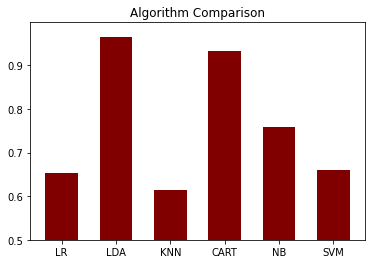

In [8]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.ylim(.500, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()